# <font color='black'>Applied Data Science Project Grupp 21 - FS 2022</font>
# <font color='blue'>Hunde</font>
<font color="blue">Quellen</font>
<li>d_dataopt_crime_cart_random_forest by Maria</li>

## <font color='blue'>Preparation</font>
<font color='blue'>Installed Tools</font>
<li>pip install seaborn</li>
<li>pip install pandas</li>
<li>pip install numpy</li>
<li>pip install matplotlib.pyplot</li>
<li>pip install sklearn</li>

In [25]:
# Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print ("Import Libraries Successfull")

Import Libraries Successfull


In [12]:
#load Open Data Api

# Working directory
"""os.chdir('/Users/andreazkb/Documents/GitHub/Projektarbeit_ADS_FS2022_Gruppe_21')
print(os.getcwd()) """

"os.chdir('/Users/andreazkb/Documents/GitHub/Projektarbeit_ADS_FS2022_Gruppe_21')\nprint(os.getcwd()) "

In [11]:
#API Open Data Stadt Zürich
"""import urllib
url = 'https://data.stadt-zuerich.ch/api/3/action/datastore_search?resource_id=84a666ff-bde9-4fd7-9e76-192ea5fee09f&limit=5&q=title:jones'
fileobj = urllib.urlopen(url)
print fileobj.read()"""

"import urllib\nurl = 'https://data.stadt-zuerich.ch/api/3/action/datastore_search?resource_id=84a666ff-bde9-4fd7-9e76-192ea5fee09f&limit=5&q=title:jones'\nfileobj = urllib.urlopen(url)\nprint fileobj.read()"

In [79]:
#Import and Prepare CSV
hundehalter = pd.read_csv("20220307_hundehalter.csv", delimiter=',')
hundehalter.drop(["HALTER_ID","RASSE1_MISCHLING","RASSE2","RASSE2_MISCHLING","RASSENTYP","HUNDEFARBE"],axis=1,inplace=True)
hundehalter.sample(10)

,ALTER,GESCHLECHT,STADTKREIS,STADTQUARTIER,RASSE1,GEBURTSJAHR_HUND,GESCHLECHT_HUND
6793,51-60,m,7,72,Mischling klein,2014,w
588,61-70,w,10,102,Deutscher Schäfer,2009,m
2091,51-60,w,11,119,Pekingese,2013,w
4933,51-60,w,4,42,Labrador Retriever,2020,w
7802,31-40,w,8,82,Dachshund,2014,w
4350,51-60,w,3,31,Segugio italiano,2013,m
4256,41-50,w,3,31,Mischling klein,2010,m
4491,71-80,w,3,33,Havaneser,2013,m
5409,51-60,m,5,51,Deutscher Schäfer,2017,m
2531,41-50,w,12,121,Chihuahua,2009,m


In [80]:
hundehalter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9173 entries, 0 to 9172
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ALTER             9173 non-null   object
 1   GESCHLECHT        9173 non-null   object
 2   STADTKREIS        9173 non-null   int64 
 3   STADTQUARTIER     9173 non-null   int64 
 4   RASSE1            9173 non-null   object
 5   GEBURTSJAHR_HUND  9173 non-null   int64 
 6   GESCHLECHT_HUND   9173 non-null   object
dtypes: int64(3), object(4)
memory usage: 501.8+ KB


In [81]:
hundehalter.dtypes

ALTER               object
GESCHLECHT          object
STADTKREIS           int64
STADTQUARTIER        int64
RASSE1              object
GEBURTSJAHR_HUND     int64
GESCHLECHT_HUND     object
dtype: object

In [82]:
#Normalize Data - Objects into Categories
hundehalter["STADTKREIS"] = hundehalter["STADTKREIS"].astype('category')
hundehalter["STADTQUARTIER"] = hundehalter["STADTQUARTIER"].astype('category')
hundehalter["ALTER"] = hundehalter["ALTER"].astype('category')
"""hundehalter["RASSE1"] = hundehalter["RASSE1"].astype('category')"""
hundehalter["GESCHLECHT"] = hundehalter["GESCHLECHT"].astype('category')
hundehalter["GESCHLECHT_HUND"] = hundehalter["GESCHLECHT_HUND"].astype('category')


hundehalter["ALTER_KATEGORIE"] = hundehalter["ALTER"].cat.codes
"""hundehalter["RASSE1_KATEGORIE"] = hundehalter["RASSE1"].cat.codes"""
hundehalter["GESCHLECHT_KATEGORIE"] = hundehalter["GESCHLECHT"].cat.codes
hundehalter["GESCHLECHT_HUND_KATEGORIE"] = hundehalter["GESCHLECHT_HUND"].cat.codes
hundehalter["STADTKREIS_KATEGORIE"] = hundehalter["STADTKREIS"].cat.codes
hundehalter["STADTQUARTIER_KATEGORIE"] = hundehalter["STADTQUARTIER"].cat.codes

#Normalize Data - Booleans with One Hot Encoding


hundehalter.head()


"""df_orig["District_simple"] = df_orig["District_simple"].astype('category')
df_orig["WE_Workday"] = df_orig["WE_Workday"].astype('category')"""

'df_orig["District_simple"] = df_orig["District_simple"].astype(\'category\')\ndf_orig["WE_Workday"] = df_orig["WE_Workday"].astype(\'category\')'

In [83]:
hundehalter.dtypes

ALTER                        category
GESCHLECHT                   category
STADTKREIS                   category
STADTQUARTIER                category
RASSE1                         object
GEBURTSJAHR_HUND                int64
GESCHLECHT_HUND              category
ALTER_KATEGORIE                  int8
GESCHLECHT_KATEGORIE             int8
GESCHLECHT_HUND_KATEGORIE        int8
STADTKREIS_KATEGORIE             int8
STADTQUARTIER_KATEGORIE          int8
dtype: object

In [84]:
hundehalter.drop(["GESCHLECHT_HUND_KATEGORIE","STADTQUARTIER_KATEGORIE","GEBURTSJAHR_HUND"],axis=1,inplace=True)

In [85]:
hundehalter.sample(10)

,ALTER,GESCHLECHT,STADTKREIS,STADTQUARTIER,RASSE1,GESCHLECHT_HUND,ALTER_KATEGORIE,GESCHLECHT_KATEGORIE,STADTKREIS_KATEGORIE
1394,21-30,m,11,111,Border Collie,w,1,0,10
6785,21-30,w,7,72,Mischling klein,m,1,1,6
2058,31-40,m,11,119,Weisser Schäferhund (Berger Blanc Suisse),m,2,0,10
1765,21-30,w,11,115,Pomeranian,w,1,1,10
1810,21-30,m,11,115,Mischling,m,1,0,10
8444,31-40,w,9,91,Pomeranian,w,2,1,8
7971,21-30,w,8,83,Zwergspitz,m,1,1,7
6466,61-70,w,7,71,Vizsla,w,5,1,6
2033,21-30,w,11,119,Yorkshire Terrier,m,1,1,10
8942,31-40,m,9,92,Zwergpudel,w,2,0,8


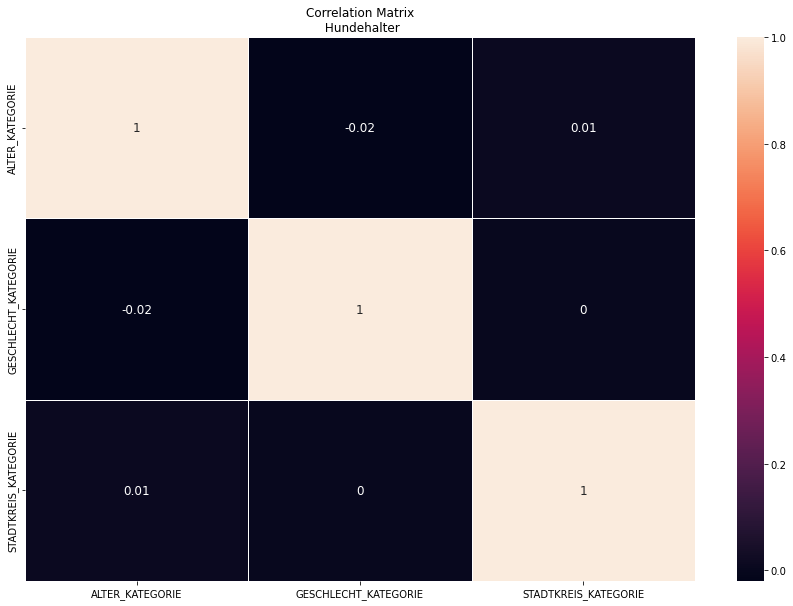

In [92]:
hundehalter_heatmap = hundehalter.corr().round(2)
f, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(correlation, annot = True, annot_kws={'size': 12}, linewidths=.5)
plt.title("Correlation Matrix\n Hundehalter")
plt.savefig('heatmap.png')  
plt.show()  

# <font color='blue'>Unfälle</font>
<font color="blue">Quellen</font>
<li>d_dataopt_crime_cart_random_forest by Maria</li>
<li>RoadTrafficAccidentLocations.csv</li>

In [95]:
#Import and Prepare CSV
unfallstellen = pd.read_csv("RoadTrafficAccidentLocations.csv", delimiter=',')
unfallstellen.drop(["AccidentType_fr","AccidentType_it","AccidentType_en","AccidentSeverityCategory","AccidentSeverityCategory_fr","AccidentSeverityCategory_it","AccidentSeverityCategory_en","AccidentUID","AccidentType","RoadType_fr","RoadType_it","RoadType_en"],axis=1,inplace=True)
unfallstellen.sample(10)

,AccidentType_de,AccidentSeverityCategory_de,AccidentInvolvingPedestrian,AccidentInvolvingBicycle,AccidentInvolvingMotorcycle,RoadType,RoadType_de,AccidentLocation_CHLV95_E,AccidentLocation_CHLV95_N,CantonCode,...,AccidentMonth_fr,AccidentMonth_it,AccidentMonth_en,AccidentWeekDay,AccidentWeekDay_de,AccidentWeekDay_fr,AccidentWeekDay_it,AccidentWeekDay_en,AccidentHour,AccidentHour_text
35942,Auffahrunfall,Unfall mit Sachschaden,False,False,False,rt430,Autobahn,2680553,1253619,ZH,...,novembre,Novembre,November,aw406,Samstag,samedi,Sabato,Saturday,15.0,15h-16h
39677,Fussgängerunfall,Unfall mit Leichtverletzten,False,False,False,rt433,Nebenstrasse,2682870,1250859,ZH,...,juin,Giugno,June,aw405,Freitag,vendredi,Venerdì,Friday,15.0,15h-16h
27801,Parkierunfall,Unfall mit Sachschaden,False,False,False,rt433,Nebenstrasse,2683626,1250611,ZH,...,juin,Giugno,June,aw406,Samstag,samedi,Sabato,Saturday,7.0,07h-08h
26432,Schleuder- oder Selbstunfall,Unfall mit Sachschaden,False,False,False,rt433,Nebenstrasse,2678884,1247999,ZH,...,avril,Aprile,April,aw401,Montag,lundi,Lunedí,Monday,15.0,15h-16h
52352,Parkierunfall,Unfall mit Sachschaden,False,False,False,rt433,Nebenstrasse,2682166,1248108,ZH,...,octobre,Ottobre,October,aw405,Freitag,vendredi,Venerdì,Friday,22.0,22h-23h
31440,Parkierunfall,Unfall mit Sachschaden,False,False,False,rt433,Nebenstrasse,2683752,1246804,ZH,...,février,Febbraio,February,aw402,Dienstag,mardi,Martedì,Tuesday,15.0,15h-16h
28350,Auffahrunfall,Unfall mit Sachschaden,False,False,False,rt432,Hauptstrasse,2686660,1251312,ZH,...,juillet,Luglio,July,aw403,Mittwoch,mercredi,Mercoledì,Wednesday,18.0,18h-19h
2725,Parkierunfall,Unfall mit Sachschaden,False,False,False,rt439,andere,2683803,1250873,ZH,...,septembre,Settembre,September,aw404,Donnerstag,jeudi,Giovedì,Thursday,19.0,19h-20h
51428,Auffahrunfall,Unfall mit Sachschaden,False,False,False,rt433,Nebenstrasse,2679471,1249139,ZH,...,août,Agosto,August,aw405,Freitag,vendredi,Venerdì,Friday,15.0,15h-16h
8232,Auffahrunfall,Unfall mit Leichtverletzten,False,False,False,rt432,Hauptstrasse,2683755,1246320,ZH,...,avril,Aprile,April,aw403,Mittwoch,mercredi,Mercoledì,Wednesday,12.0,12h-13h


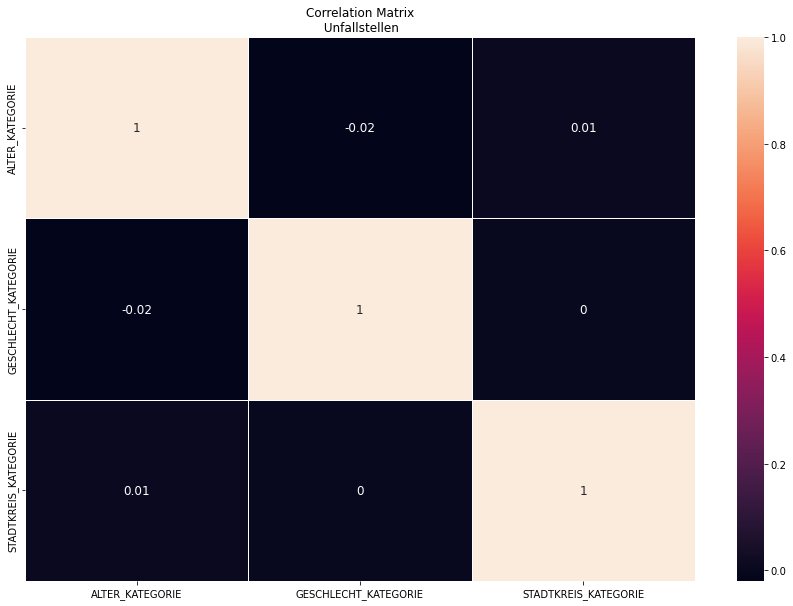

In [97]:
unfallstellen_heatmap = unfallstellen.corr().round(2)
f, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(correlation, annot = True, annot_kws={'size': 12}, linewidths=.5)
plt.title("Correlation Matrix\n Unfallstellen")
plt.savefig('heatmap.png')  
plt.show()  